
# Немного организационных вопросов



In [5]:
# Установка git-lfs
!apt-get install git-lfs 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-410
Use 'apt autoremove' to remove it.
The following NEW packages will be installed:
  git-lfs
0 upgraded, 1 newly installed, 0 to remove and 6 not upgraded.
Need to get 2,129 kB of archives.
After this operation, 7,662 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 git-lfs amd64 2.3.4-1 [2,129 kB]
Fetched 2,129 kB in 1s (2,590 kB/s)
Selecting previously unselected package git-lfs.
(Reading database ... 131294 files and directories currently installed.)
Preparing to unpack .../git-lfs_2.3.4-1_amd64.deb ...
Unpacking git-lfs (2.3.4-1) ...
Setting up git-lfs (2.3.4-1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...


In [6]:
# Скачиваем данные из репозитория https://github.com/lbuklya/audio_workshop
!git lfs clone https://github.com/lbuklya/audio_workshop.git 

          with new flags from 'git clone'

'git clone' has been updated in upstream Git to have comparable
speeds to 'git lfs clone'.
Cloning into 'audio_workshop'...
remote: Enumerating objects: 1034, done.
remote: Counting objects: 100% (1034/1034), done.
remote: Compressing objects: 100% (1025/1025), done.
remote: Total 1034 (delta 3), reused 1029 (delta 3), pack-reused 0
Receiving objects: 100% (1034/1034), 478.56 MiB | 36.25 MiB/s, done.
Resolving deltas: 100% (3/3), done.
Checking out files: 100% (1021/1021), done.
Git LFS: (4 of 4 files) 1.44 GB / 1.44 GB


In [7]:
# Распаковываем полученный архив
!unzip audio_workshop/data/genres.zip -d audio_workshop/data/

Archive:  audio_workshop/data/genres.zip
   creating: audio_workshop/data/genres/
   creating: audio_workshop/data/genres/blues/
  inflating: audio_workshop/data/genres/blues/blues.00000.wav  
  inflating: audio_workshop/data/genres/blues/blues.00001.wav  
  inflating: audio_workshop/data/genres/blues/blues.00002.wav  
  inflating: audio_workshop/data/genres/blues/blues.00003.wav  
  inflating: audio_workshop/data/genres/blues/blues.00004.wav  
  inflating: audio_workshop/data/genres/blues/blues.00005.wav  
  inflating: audio_workshop/data/genres/blues/blues.00006.wav  
  inflating: audio_workshop/data/genres/blues/blues.00007.wav  
  inflating: audio_workshop/data/genres/blues/blues.00008.wav  
  inflating: audio_workshop/data/genres/blues/blues.00009.wav  
  inflating: audio_workshop/data/genres/blues/blues.00010.wav  
  inflating: audio_workshop/data/genres/blues/blues.00011.wav  
  inflating: audio_workshop/data/genres/blues/blues.00012.wav  
  inflating: audio_workshop/data/genres

### Загрузка библиотек

In [0]:
import os
import sys
import csv
import time
import tqdm
import scipy
import sklearn
import itertools
import numpy as np
import pandas as pd
from pathlib import Path
import IPython.display as ipd
import matplotlib.pyplot as plt

import librosa
import librosa.display

### Определение констант

In [0]:
PROJECT_DIR = 'audio_workshop'
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
GENRES_DATA_DIR = os.path.join(DATA_DIR, 'genres')

GENRES = os.listdir(GENRES_DATA_DIR)

# Как люди распознают музыку?



*   Вибрация молекул воздуха (звуковые волны)
*   Детекция звуковых волн внешним ухом
*   Преобразование звуковых волн в звуковые сигналы
*   Отправка сигналов через слуховой нерв в мозг

![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/kulak.jpg?raw=true)


# Как преобразовать аналоговый сигнал в цифровой?

* Аналоговый сигнал представляет собой непрерывную волну в виде синусоиды (изображена ниже), и может варьироваться по силе сигнала (амплитуде) или частоте (времени).

* Цифровой сигнал двоичен (0 и 1) и, следовательно, не может принимать какие-либо дробные значения.

* Для получения цифровых сигналов из аналоговых применяют квантование. Компьютеры могут захватывать такие данные только в отдельные моменты времени. Скорость, с которой компьютер захватывает аудиоданные, называется частотой дискретизации.

* Например, если мы используем частоту дискретизации 44,1 кГц, это означает, что мы используем 44100 сэмплов (выборок) в секунду.

* Люди могут слышать звуки в диапазоне 0-140 дБ и 20-20000 Гц!

![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/low.jpg?raw=true)

![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/high.jpg?raw=true)


# Представления аудиосигнала

![alt text](https://upload.wikimedia.org/wikipedia/commons/5/50/Signal_Sampling.png) 

* Возьмем две мелодии из датасета GTZAN как массив сэмплов. Датасет GTZAN использовался в исследовании ["Musical genre classification of audio signals"](https://www.researchgate.net/publication/3333877_Musical_genre_classification_of_audio_signals_IEEE_Trans_Speech_Audio_Process)  (G. Tzanetakis, P. Cook). Датасет состоит из 1000 звуковых дорожек длиной 30 секунд и содержит 10 жанров: блюз, классика, кантри, диско, хип-хоп, джаз, регги, рок, метал и поп. В каждом жанре по 100 звуковых дорожек.
* Частота дискретизации - 22050 Гц.
* Возьмем по 5 секундных отрывков из этих мелодий


In [0]:
sampling_rate=22050

x_metal,sr=librosa.load(os.path.join(GENRES_DATA_DIR,'metal/metal.00001.wav'),sr=sampling_rate,mono=True,duration=5.0)
x_classical,sr=librosa.load(os.path.join(GENRES_DATA_DIR,'classical/classical.00001.wav'),sr=sampling_rate,mono=True,duration=5.0)

In [11]:
print("Массив сэмплов мелодии жанра metal:(размер={})\n{}:\n ".format(x_metal.shape,x_metal))
print("Массив сэмплов мелодии классического жанра:(размер={})\n{}".format(x_classical.shape,x_classical))

Массив сэмплов мелодии жанра metal:(размер=(110250,))
[ 0.1164856   0.1194458   0.12341309 ... -0.11724854 -0.07055664
  0.01409912]:
 
Массив сэмплов мелодии классического жанра:(размер=(110250,))
[-0.01138306 -0.00216675  0.01687622 ...  0.03826904  0.03649902
  0.03051758]


* Теперь мы имеем 110250 сэмплов с частотой дискретизации 22.05 KHz.
* Такой массив сэмплов у нас имеется для каждой мелодии.
* Каждый элемент массива - это сэмпл из сигнала.
* Получим графики для каждой мелодии.


Text(0.5, 1.0, 'Classical')

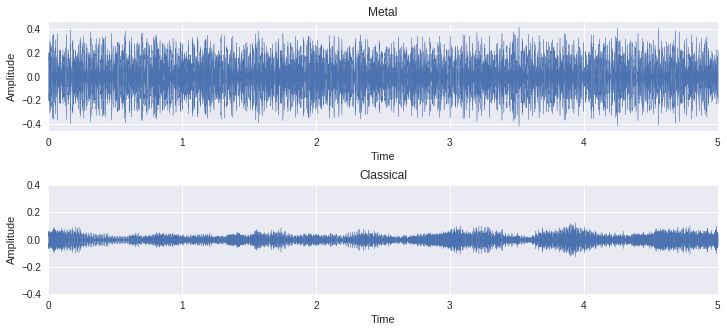

In [12]:
# Временная область
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2, 1, 1)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_metal,sampling_rate)
plt.title('Metal')

plt.subplot(2, 1, 2)
plt.ylim(-0.4,0.4)
plt.xlabel("Time")
plt.ylabel("Amplitude")
librosa.display.waveplot(x_classical,sampling_rate)
plt.title('Classical')

Послушаем мелодии

In [13]:
ipd.Audio(x_metal, rate=sampling_rate)

In [14]:
ipd.Audio(x_classical, rate=sampling_rate)

* Между двумя графиками заметны некоторые различия.
* Из таких графиков мы можем получить информацию только об амплитуде и времени.
* Мы не сможем многому научиться, имея только такую информацию.

**ЧТО ДЕЛАТЬ?**

* Применить преобразование Фурье.
* Анализировать всю песню целиком - не очень хороший способ.
* При обработке аудио принято работать с одним кадром за раз, используя фиксированный размер кадра и шаг. Кадры обычно выбираются длительностью от 10 до 100 мс.
* Мы вычисляем признаки из кадров.

**Некоторые понятия:**
* Длина кадра: количество сэмплов в кадре.
* Длина прыжка (шага): длина между кадрами (в сэмплах).
* В данном случае мы используем длину кадра - 2048 и длину прыжка - 512.
* Также эти значения являются стандартными для Librosa.

## Сегментация

In [0]:
hop_size=512
frame_size=2048

In [18]:
F=librosa.util.frame(x_metal,frame_length=frame_size,hop_length=hop_size)
x,y=F.shape

print("Кол-во кадров={} с длиной кадра={} для мелодии жанра metal".format(y,x))
print("Общее кол-во сэмплов = {}\n".format(y*x+hop_size))
print(F)

F2=librosa.util.frame(x_classical,frame_length=frame_size,hop_length=hop_size)
x2,y2=F2.shape

print("\nКол-во кадров={} с длиной кадра={} для мелодии классического жанра".format(y2,x2))
print("Общее кол-во сэмплов = {}\n".format(y2*x2+hop_size))
print(F2)

Кол-во кадров=212 с длиной кадра=2048 для мелодии жанра metal
Общее кол-во сэмплов = 434688

[[ 0.1164856  -0.00854492  0.01278687 ...  0.02215576 -0.09536743
  -0.11962891]
 [ 0.1194458  -0.15008545  0.01974487 ...  0.07736206 -0.12322998
  -0.18969727]
 [ 0.12341309 -0.16726685  0.03915405 ... -0.07910156 -0.1354065
  -0.10519409]
 ...
 [-0.16091919  0.0423584   0.01986694 ...  0.01937866  0.08105469
  -0.11630249]
 [-0.12545776 -0.01464844 -0.00216675 ...  0.05496216  0.152771
  -0.08566284]
 [-0.1257019  -0.10620117 -0.02612305 ...  0.08065796  0.09298706
  -0.06903076]]

Кол-во кадров=212 с длиной кадра=2048 для мелодии классического жанра
Общее кол-во сэмплов = 434688

[[-0.01138306  0.04495239 -0.07385254 ...  0.05505371  0.01245117
   0.04724121]
 [-0.00216675  0.02770996 -0.07080078 ...  0.06387329  0.0123291
   0.05960083]
 [ 0.01687622  0.02441406 -0.05963135 ...  0.06573486  0.02102661
   0.065979  ]
 ...
 [ 0.02804565 -0.03881836 -0.04690552 ...  0.01037598 -0.02514648
  -

**Можно ли сделать сегментацию другим способом?**
* Если мы сможем найти наиболее ценные точки в сигнале и выполнить сегментацию после этих точек, то сможем получить ценную информацию с меньшим количеством кадров. 

## Onset detection

**Автоматическое обнаружение начала (Onset detection)**
* Автоматическое обнаружение музыкальных событий в аудиосигнале является одной из наиболее фундаментальных задач при поиске музыкальной информации. Здесь мы покажем, как обнаружить начало - тот самый момент, который отмечает начало переходной части звука, или самый ранний момент, когда переходный процесс может быть надежно обнаружен. Т.е. мы ищем места, где слышен (или начинается) внезапный звуковой взрыв, и отмечаем эти моменты времени.

![](https://github.com/lbuklya/audio_workshop/blob/master/img/onset.jpg?raw=true)

In [19]:
#Onset Detection
onset_frames = librosa.onset.onset_detect(x_metal, sr=sampling_rate,hop_length=hop_size)
onset_times = librosa.frames_to_time(onset_frames)
x=onset_frames.size
print("Кол-во обнаруженных начал для мелодии жанра metal={}".format(x))
print(onset_frames)


onset_frames2 = librosa.onset.onset_detect(x_classical, sr=sampling_rate,hop_length=hop_size)
onset_times2 = librosa.frames_to_time(onset_frames2)
x2=onset_frames2.size
print("\nКол-во обнаруженных начал для мелодии классического жанра={}".format(x2))
print(onset_frames2)

Кол-во обнаруженных начал для мелодии жанра metal=33
[  3   7  11  19  27  35  44  48  51  60  68  77  84  93  98 101 110 118
 127 131 135 144 151 156 163 168 175 180 184 193 196 201 205]

Кол-во обнаруженных начал для мелодии классического жанра=23
[  5  18  26  46  50  56  69  80  83  91 106 113 122 128 134 146 157 166
 168 180 190 200 211]


Получим графики с найденными началами.

Text(0.5, 1.0, 'Classical')

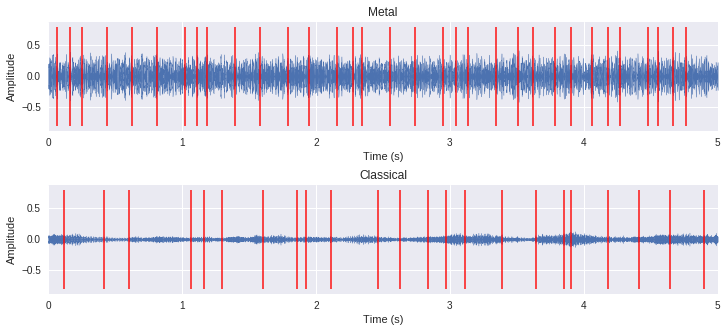

In [20]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
librosa.display.waveplot(x_metal, sr=sampling_rate)
plt.vlines(onset_times, -0.8, 0.79, color='r', alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Metal')

plt.subplot(2,1,2)
librosa.display.waveplot(x_classical, sr=sampling_rate)
plt.vlines(onset_times2, -0.8, 0.79, color='r', alpha=0.8)
plt.xlabel("Time (s)")
plt.ylabel("Amplitude")
plt.title('Classical')

Давайте создадим звук щелчка и добавим этот звук к каждому началу сигнала.

In [21]:
clicks = librosa.clicks(frames=onset_frames, sr=sampling_rate, length=len(x_metal))
ipd.Audio(x_metal + clicks, rate=sampling_rate)

In [22]:
clicks = librosa.clicks(frames=onset_frames2, sr=sampling_rate, length=len(x_classical))
ipd.Audio(x_classical + clicks, rate=sampling_rate)

## Преобразование Фурье

Преобразование Фурье - одна из самых фундаментальных операций в прикладной математике и обработке сигналов. Она преобразует наш сигнал из временной области в частотную. В то время как во временной области наш сигнал выражается в виде последовательности сэмплов, в частотной области наш сигнал можно представить как суперпозицию синусоид различной величины, частоты и сдвига по фазе.

![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/time_and_freq.jpg?raw=true)


![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/video.gif?raw=true)


Давайте применим преобразование Фурье к каждой мелодии и получим спектры.

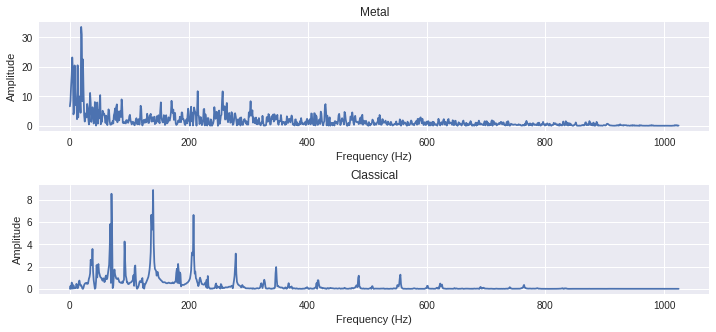

In [23]:
# Fourier Transform and Spectrum

window_size=2048

fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
FFT_Metal=librosa.stft(x_metal, window_size)
FFT_Metal_Mag=np.absolute(FFT_Metal)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Metal')
plt.plot(FFT_Metal_Mag[:,0])

plt.subplot(2,1,2)
FFT_Classical=librosa.stft(x_classical, window_size)
FFT_Classical_Mag=np.absolute(FFT_Classical)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Classical')
plt.plot(FFT_Classical_Mag[:,0]);

* Мы получили информацию о частотах сигнала.
* Но потеряли информацию о времени.
* Каким образом можно получить информацию о времени и частоте одновременно?

## Кратковременное преобразование Фурье



* Музыкальные сигналы сильно нестационарны, т.е. их статистика со временем меняется. Было бы довольно бессмысленно вычислять спектр всей 10-минутной песни.
* С помощью STFT мы разбиваем сигнал на дискретные окна.
* Мы используем функцию окна, такую как Хеннинг, Хэмминг, полиномиальная функция ...
* Каждый сигнал в окне является стационарным сигналом.
* После того как мы применяем БПФ к каждому окну, мы получаем спектограмму сигнала.
* **Размер окна:** кол-во сэмплов в каждом окне.
* Давайте вычислим STFT для каждой мелодии и построим спектрограммы.

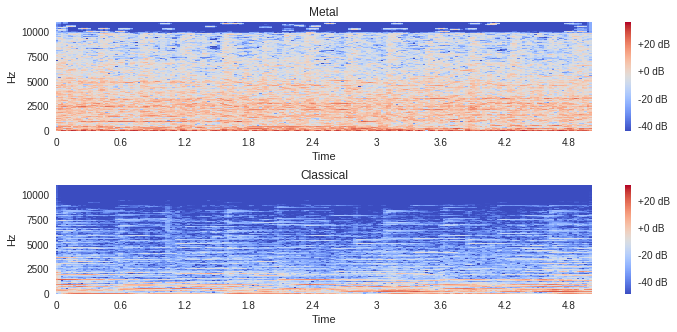

In [24]:
#Short-Time Fourier Transform and Spectogram

fig=plt.figure(figsize=(12,5));
fig.subplots_adjust(hspace=.5);

plt.subplot(2,1,1)
S = abs(librosa.stft(x_metal, n_fft=window_size))
logS = librosa.amplitude_to_db(S)
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='hz');
plt.colorbar(format='%+2.0f dB');

plt.subplot(2,1,2)
S2 = abs(librosa.stft(x_classical, n_fft=window_size))
logS2 = librosa.amplitude_to_db(S2)
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='hz');
plt.colorbar(format='%+2.0f dB');

Давайте добавим начала, которые мы обнаружили до этого, к спектрограммам.

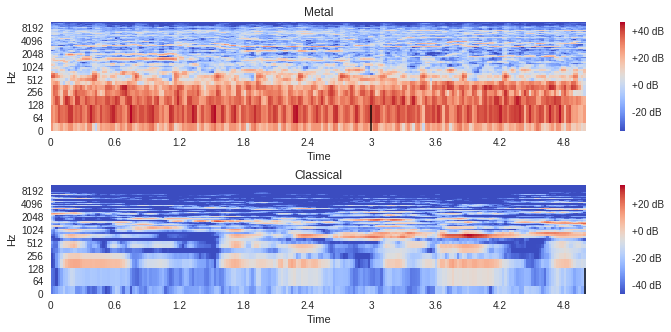

In [31]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
S = librosa.feature.melspectrogram(x_metal, sr=sampling_rate, n_fft=window_size)
logS = librosa.amplitude_to_db(S)
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(onset_frames, 0, logS.shape[0], color='k', alpha=0.8)
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
S2 = librosa.feature.melspectrogram(x_classical, sr=sampling_rate, n_fft=window_size)
logS2 = librosa.amplitude_to_db(S2)
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='log')
plt.vlines(onset_frames2, 0, logS.shape[0], color='k', alpha=0.8)
plt.colorbar(format='%+2.0f dB')

## Мел-шкала

![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/mel_scale.jpeg?raw=true)

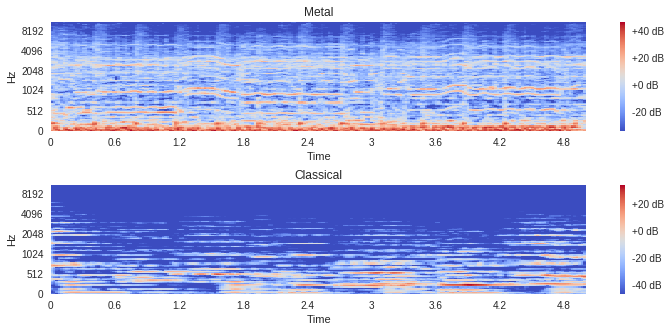

In [25]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
S = librosa.feature.melspectrogram(x_metal, sr=sampling_rate, n_fft=window_size)
logS = librosa.amplitude_to_db(S)
plt.title('Metal')
librosa.display.specshow(logS, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')

plt.subplot(2,1,2)
S2 = librosa.feature.melspectrogram(x_classical, sr=sampling_rate, n_fft=window_size)
logS2 = librosa.amplitude_to_db(S2)
plt.title('Classical')
librosa.display.specshow(logS2, sr=sampling_rate, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB');

## Хромограмма


![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/chroma.jpg?raw=true)

In [0]:
chroma_metal = librosa.feature.chroma_stft(x_metal, sr=sampling_rate, n_fft=window_size)
chroma_classical = librosa.feature.chroma_stft(x_classical, sr=sampling_rate, n_fft=window_size)

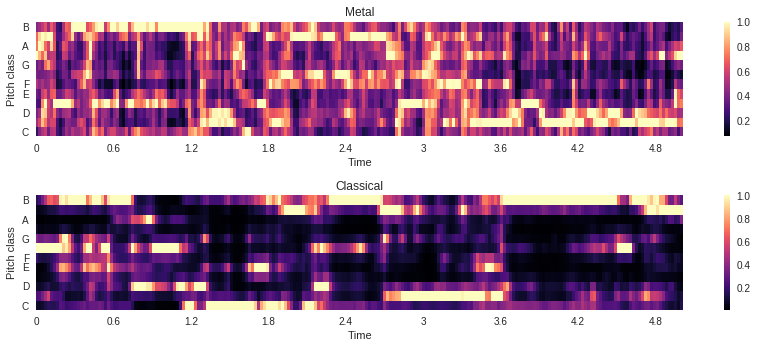

In [27]:
fig=plt.figure(figsize=(12,5))
fig.subplots_adjust(hspace=.5)

plt.subplot(2,1,1)
# plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_metal, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Metal')
plt.tight_layout()

plt.subplot(2,1,2)
# plt.figure(figsize=(10, 4))
librosa.display.specshow(chroma_classical, y_axis='chroma', x_axis='time')
plt.colorbar()
plt.title('Classical')
plt.tight_layout()

## Мел-кепстральные коэффициенты
https://haythamfayek.com/2016/04/21/speech-processing-for-machine-learning.html

![alt text](https://github.com/lbuklya/audio_workshop/blob/master/img/mffc_alg.jpeg?raw=true)

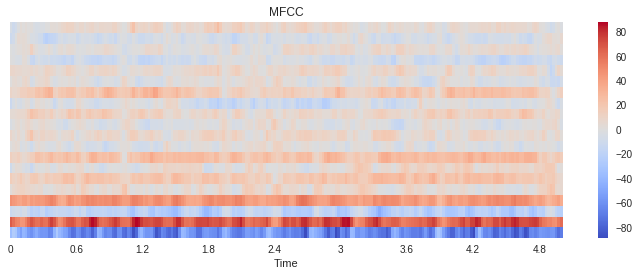

In [28]:
mfcc = librosa.feature.mfcc(y=x_metal, sr=sr)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, x_axis='time')
plt.colorbar()
plt.title('MFCC')
plt.tight_layout()

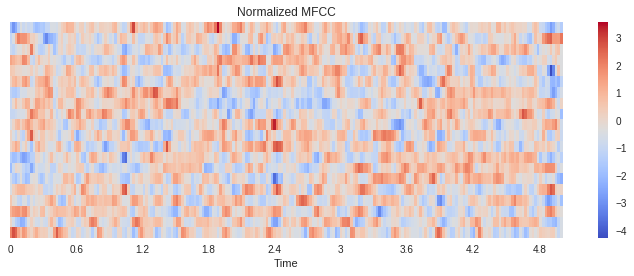

In [29]:
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
plt.figure(figsize=(10, 4))
librosa.display.specshow(mfcc, sr=sr, x_axis='time')
plt.colorbar()
plt.title('Normalized MFCC')
plt.tight_layout()

# Извлечение признаков


### Загрузка аудиофайла

In [0]:
# Загрузите с помощью librosa аудио classical/classical.00000.wav'

In [0]:
# Воспроизведите загруженное аудио

In [0]:
# Отрисуйте волновой вид загруженного аудио (librosa.display.waveplot)


### Beat tracking
https://www.analyticsvidhya.com/blog/2018/02/audio-beat-tracking-for-music-information-retrieval/

Отслеживание ритма - это задача идентификации и синхронизации с основным ритмическим импульсом музыкального произведения. В естественных условиях это происходит часто, например, когда люди стучат ногами, хлопают в ладоши или танцуют под музыку.

In [0]:
# Посчитайте признаки beat и tempo 
# https://librosa.github.io/librosa/generated/librosa.beat.beat_track.html#librosa.beat.beat_track

### Частота перехода через ноль

Частота перехода через ноль - это кол-во изменений знака вдоль сигнала, т.е. скорость, с которой сигнал изменяется с положительного на отрицательный или обратно. Эта функция широко используется как для распознавания речи, так и в работе с музыкальной информацией. Обычно она имеет более высокие значения для таких жанров, как металл и рок.

In [0]:
n0 = 8000
n1 = 8100
# Посчитайте признак zero_crossings на части сигнала y[n0:n1] 
# https://librosa.github.io/librosa/generated/librosa.feature.zero_crossing_rate.html
# Выведите количество пересечений 0 (не забывайте, что zcp это скорость)

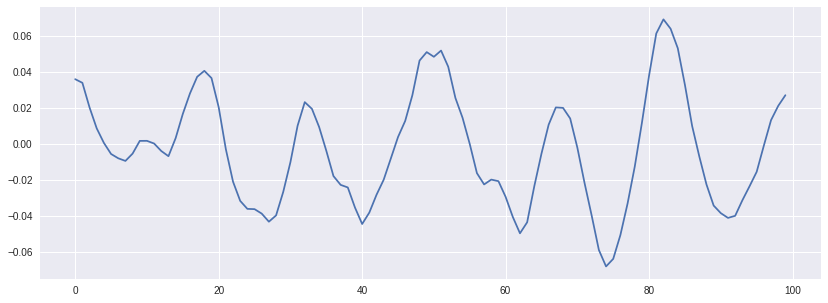

In [0]:
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])

### Спектральный центроид

In [0]:
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Спектральный центроид указывает, где расположен «центр масс» для звука, и рассчитывается как средневзвешенное значение частот, присутствующих в звуке. Например, по сравнению с мелодией жанра blues, которая равномерна по всей длине, мелодия жанра metal имеет больше частот к концу. Таким образом, спектральный центроид для мелодии жанра blues будет находиться ближе к середине его спектра, а для песни жанра metal - ближе к концу.

librosa.feature.spectral_centroid() вычисляет спектральный центроид для каждого кадра в сигнале

In [0]:
# Посчитайте спектральный центроид spectral_centroids
# https://librosa.github.io/librosa/generated/librosa.feature.spectral_centroid.html

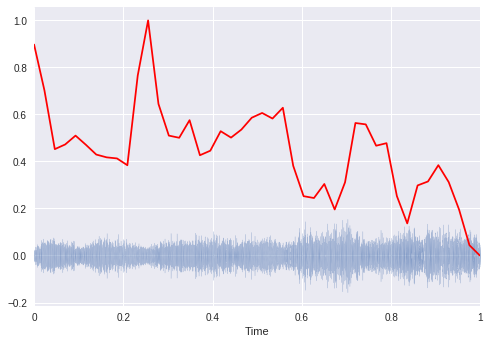

In [0]:
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)

librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='r')

### Спектральный спад частоты

Спектральный спад частоты представляет собой частоту, ниже которой лежит указанный процент от общей спектральной энергии (например, 85%).

librosa.feature.spectral_rolloff вычисляет частоту спада для каждого кадра в сигнале

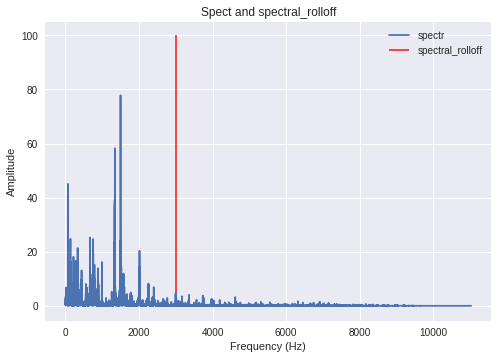

In [0]:
plt.plot(STFT_Mag[:,0])
plt.vlines(spectral_rolloff[0][0], -0.5, 100, color='r', alpha=0.8)
plt.xlabel("Frequency (Hz)")
plt.ylabel("Amplitude")
plt.title('Spect and spectral_rolloff')
plt.legend(['spectr', 'spectral_rolloff']);

In [0]:
# Посчитайте cпектральный спад частоты spectral_rolloff
# https://librosa.github.io/librosa/generated/librosa.feature.spectral_rolloff.html

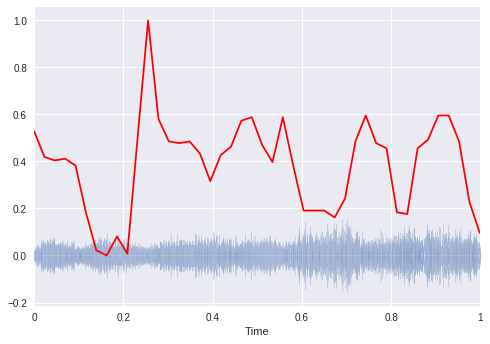

In [0]:
librosa.display.waveplot(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

### Среднеквадратичная энергия
https://musicinformationretrieval.com/energy.html

Вычислить среднеквадратичное значение (RMS) для каждого кадра либо из аудиосэмплов, либо из спектрограммы S.

Вычисление среднеквадратичного значения из аудиосэмплов происходит быстрее, так как не требует вычисления STFT. Однако использование спектрограммы даст более точное представление энергии во времени, потому что ее кадры могут быть оконными, поэтому предпочтительнее использовать S.

In [0]:
# Вычислите среднеквадратичную энергию rmse 
# https://librosa.github.io/librosa/generated/librosa.feature.rmse.html

# Получение датафрейма с признаками


In [0]:
columns = 'filename tempo beats chroma_stft rmse spectral_centroid \
spectral_bandwidth rolloff zero_crossing_rate'
for i in range(1, 21):
    columns += f' mfcc{i}'
columns += ' label'
columns = columns.split()
df_path = os.path.join(DATA_DIR,'data.csv') 

In [0]:
print(columns)

['filename', 'tempo', 'beats', 'chroma_stft', 'rmse', 'spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate', 'mfcc1', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5', 'mfcc6', 'mfcc7', 'mfcc8', 'mfcc9', 'mfcc10', 'mfcc11', 'mfcc12', 'mfcc13', 'mfcc14', 'mfcc15', 'mfcc16', 'mfcc17', 'mfcc18', 'mfcc19', 'mfcc20', 'label']


In [0]:
def get_features(genre, filename, sampling_rate):
  """
  Функция, вычисляющая признаки из аудиофайла, 
    если признаки являются последовательностями, 
    то рекомендуется брать их среднее (np.mean())
  :param genre: str - жанр аудио-файла
  :param filename: str - имя аудио-файла
  :param sampling_rate: int - частота дискретизации 
  
  :return dict - словарь, ключами в котором являются columns, 
  а значениями - вычисленные признаки 
  """
    result = {}
    file_path = os.path.join(GENRES_DATA_DIR, f'{genre}/{filename}'
    # Здесь ваш код
    return result

In [0]:
features = []
for genre in tqdm.tqdm_notebook(GENRES):
    for filename in os.listdir(os.path.join(GENRES_DATA_DIR,genre)):
        features.append(get_features(genre, filename))

data = pd.concat([pd.Series(x) for x in features], axis=1).T
data = data[columns]
data.to_csv(df_path, index=False)

# Выбор модели

In [0]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    plt.figure()
    a=confusion_matrix(cnf_matrix,classes=GENRES,title='Confusion matrix')

## Разбиение на тренировочную и тестовую выборки

In [0]:
from sklearn.model_selection import cross_val_score, GridSearchCV, train_test_split
from sklearn.preprocessing import normalize, LabelEncoder, StandardScaler
from sklearn.metrics import classification_report

In [0]:
data = pd.read_csv(df_path)
data = data.drop(['filename'],axis=1)

In [0]:
labels = data['label']
encoder = LabelEncoder()
y = encoder.fit_transform(labels)

In [0]:
scaler = StandardScaler()
X = scaler.fit_transform(np.array(data.iloc[:, :-1], dtype = float))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
print ("X_train shape: " + str(X_train.shape))
print ("y_train shape: " + str(y_train.shape))
print ("X_test shape: " + str(X_test.shape))
print ("y_test shape: " + str(y_test.shape))

X_train shape: (800, 28)
y_train shape: (800,)
X_test shape: (200, 28)
y_test shape: (200,)


## Логистическая регрессия

In [0]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [0]:
grid={"C":np.logspace(-3,3,7)}
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10, iid=False)
logreg_cv.fit(X_train,y_train)

print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

Training Score: 0.682
Test score: 0.645
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[8 6 8 8 8 7 0 9 6 6 7 8 2 1 5 6 4 6 9 8 0 6 1 1 7 2 2 2 5 3 2 3 0 2 5 2 9
 4 3 3 0 4 6 9 5 0 4 7 9 7 8 3 0 2 3 6 7 4 5 6 6 1 2 1 0 0 5 0 0 3 7 9 8 5
 6 2 5 6 7 7 0 1 0 4 5 8 6 7 0 7 5 3 7 2 8 4 3 2 3 0 2 8 6 2 0 5 4 6 1 0 2
 3 6 0 6 7 4 1 3 0 4 4 2 2 8 7 3 9 5 2 7 7 0 5 4 7 4 0 7 0 0 3 6 7 5 8 4 9
 7 6 0 6 4 6 2 8 1 5 9 0 4 8 0 0 2 6 5 2 0 3 8 8 8 4 7 3 5 9 1 7 4 5 7 6 8
 7 1 4 0 0 9 2 6 7 6 1 9 0 2 4]

Predicted Test dataset labels: 
[0 6 8 4 8 7 9 9 6 6 8 8 0 1 5 6 4 6 3 8 6 0 1 1 7 8 4 2 0 0 2 3 0 0 5 2 9
 6 7 6 9 4 6 6 3 8 4 7 9 3 8 3 0 2 2 5 7 6 4 6 6 8 2 1 6 0 5 0 9 3 7 3 9 5
 6 2 0 6 7 7 9 1 5 4 5 8 6 7 0 5 5 2 7 4 3 8 3 5 3 0 2 4 6 8 2 5 2 6 1 0 2
 9 6 0 6 7 8 1 4 5 4 4 9 2 8 7 3 4 5 2 7 7 0 3 4 7 3 0 5 5 8 0 6 7 5 8 9 7
 7 6 0 6 5 6 2 7 1 5 9 5 4 8 8 0 2 6 5 8 9 3 3 8 8 1 7 3 5 5 1 7 4 5 7 6 8
 7 1 7 1 6 9 3 9 7 6 1 9 0 2 4]


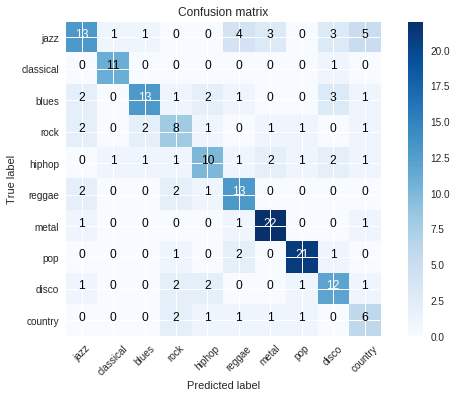

In [0]:
logistic_classifier = LogisticRegression(C=10)
logistic_classifier.fit(X_train, y_train)
print("Training Score: {:.3f}".format(logistic_classifier.score(X_train,y_train)))
print("Test score: {:.3f}".format(logistic_classifier.score(X_test,y_test)))

plot_cnf(logistic_classifier,X_test,y_test,GENRES)

## KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
# Обучите модель KNN и визуализируйте резльтаты, 
# как на примере с логистической регрессией  

## RandomForest

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
# Обучите модель RandomForest и визуализируйте резльтаты, 
# как на примере с логистической регрессией 

## SVM

In [0]:
from sklearn.svm import SVC

In [0]:
# Обучите модель SVM и визуализируйте резльтаты, 
# как на примере с логистической регрессией 

## Neural network

In [0]:
from keras import models
from keras import layers

In [0]:
model = models.Sequential()
model.add(layers.Dense(256, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [0]:
history = model.fit(X_train,
                    y_train,
                    epochs=20,
                    batch_size=128)

Epoch 1/20
800/800 [==============================] - 0s 414us/step - loss: 2.2123 - acc: 0.2088
Epoch 2/20
800/800 [==============================] - 0s 45us/step - loss: 1.9110 - acc: 0.3325
Epoch 3/20
800/800 [==============================] - 0s 44us/step - loss: 1.7022 - acc: 0.3712
Epoch 4/20
800/800 [==============================] - 0s 45us/step - loss: 1.5251 - acc: 0.4550
Epoch 5/20
800/800 [==============================] - 0s 46us/step - loss: 1.3882 - acc: 0.5275
Epoch 6/20
800/800 [==============================] - 0s 43us/step - loss: 1.2868 - acc: 0.5525
Epoch 7/20
800/800 [==============================] - 0s 47us/step - loss: 1.1972 - acc: 0.5862
Epoch 8/20
800/800 [==============================] - 0s 42us/step - loss: 1.1161 - acc: 0.6150
Epoch 9/20
800/800 [==============================] - 0s 48us/step - loss: 1.0495 - acc: 0.6388
Epoch 10/20
800/800 [==============================] - 0s 42us/step - loss: 0.9836 - acc: 0.6600
Epoch 11/20
800/800 [=================

In [0]:
test_loss, test_acc = model.evaluate(X_test,y_test)

200/200 [==============================] - 0s 504us/step


In [0]:
print('test_acc: ',test_acc)

test_acc:  0.6


### Валидация

In [0]:
x_val = X_train[:200]
partial_x_train = X_train[200:]

y_val = y_train[:200]
partial_y_train = y_train[200:]

In [0]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(partial_x_train,
          partial_y_train,
          epochs=30,
          batch_size=512,
          validation_data=(x_val, y_val))
test_loss, test_acc = model.evaluate(X_test,y_test)

Train on 600 samples, validate on 200 samples
Epoch 1/30
600/600 [==============================] - 0s 773us/step - loss: 2.3090 - acc: 0.1050 - val_loss: 2.1499 - val_acc: 0.3200
Epoch 2/30
600/600 [==============================] - 0s 29us/step - loss: 2.1439 - acc: 0.3217 - val_loss: 2.0325 - val_acc: 0.3500
Epoch 3/30
600/600 [==============================] - 0s 26us/step - loss: 2.0196 - acc: 0.3700 - val_loss: 1.9127 - val_acc: 0.3850
Epoch 4/30
600/600 [==============================] - 0s 30us/step - loss: 1.8928 - acc: 0.3933 - val_loss: 1.8019 - val_acc: 0.3650
Epoch 5/30
600/600 [==============================] - 0s 27us/step - loss: 1.7664 - acc: 0.4133 - val_loss: 1.7037 - val_acc: 0.3800
Epoch 6/30
600/600 [==============================] - 0s 24us/step - loss: 1.6422 - acc: 0.4283 - val_loss: 1.6215 - val_acc: 0.4050
Epoch 7/30
600/600 [==============================] - 0s 26us/step - loss: 1.5355 - acc: 0.4450 - val_loss: 1.5704 - val_acc: 0.4000
Epoch 8/30
600/600 [==

In [0]:
print('test_acc: ',test_acc)

test_acc:  0.615


### Тестирование

In [0]:
predictions = model.predict_classes(X_test)

In [0]:
print(classification_report(predictions, y_test))

              precision    recall  f1-score   support

           0       0.40      0.75      0.52        16
           1       0.92      0.61      0.73        18
           2       0.48      0.65      0.55        17
           3       0.56      0.64      0.60        14
           4       0.50      0.62      0.56        16
           5       0.56      0.62      0.59        16
           6       0.80      0.77      0.78        26
           7       0.88      0.76      0.81        29
           8       0.68      0.57      0.62        23
           9       0.42      0.20      0.27        25

   micro avg       0.61      0.61      0.61       200
   macro avg       0.62      0.62      0.60       200
weighted avg       0.64      0.61      0.61       200



# FastAI

In [0]:
import os
import tqdm
import librosa
import pathlib
import numpy as np
import matplotlib.pyplot as plt

In [0]:
!pip install fastai

In [0]:
cmap = plt.get_cmap('inferno')

In [0]:
PROJECT_DIR = 'audio_workshop'
DATA_DIR = os.path.join(PROJECT_DIR, 'data')
GENRES_DATA_DIR = os.path.join(DATA_DIR, 'genres')

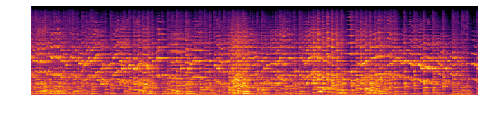

In [0]:
songname = os.path.join(GENRES_DATA_DIR, 'classical/classical.00000.wav')
y , sr = librosa.load(songname, mono=True, duration=30)
spectogram = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, n_fft=2048, hop_length=1024)
spectogram = librosa.power_to_db(spectogram, ref=np.max)
plt.axes().set_aspect('equal')
plt.imshow(spectogram, origin="lower", cmap=cmap);
plt.axis('off');

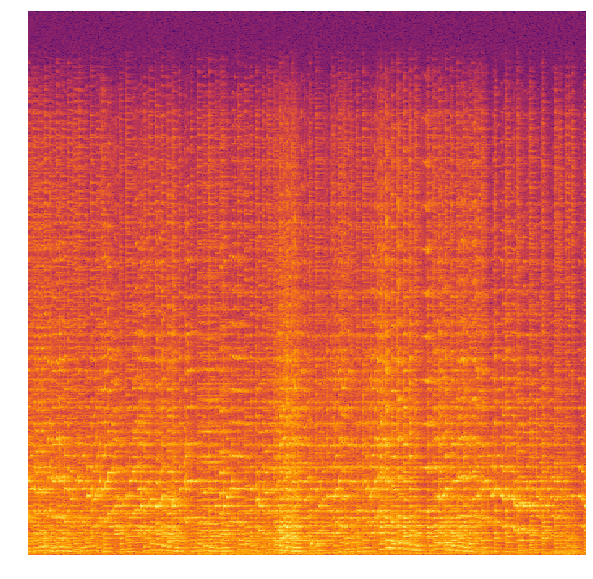

In [0]:
plt.figure(figsize=(10,10))
plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
plt.axis('off');
plt.savefig('demo.png')

In [0]:
plt.figure(figsize=(10,10))
GENRES = os.listdir(GENRES_DATA_DIR)
for genre in tqdm.tqdm_notebook(GENRES):
    pathlib.Path(os.path.join(DATA_DIR, f'img_data/{genre}')).mkdir(parents=True, exist_ok=True)     
    for filename in os.listdir(os.path.join(GENRES_DATA_DIR, genre)):
        songname = os.path.join(GENRES_DATA_DIR, f'{genre}/{filename}')
        y, sr = librosa.load(songname, mono=True, duration=30)
        plt.specgram(y, NFFT=2048, Fs=2, Fc=0, noverlap=128, cmap=cmap, sides='default', mode='default', scale='dB');
        plt.axis('off');
        plt.savefig(os.path.join(DATA_DIR, f'img_data/{genre}/{filename[:-3].replace(".", "")}.png'))
        plt.clf()
    print(f'{genre} done!')

jazz done!
classical done!
blues done!
rock done!


/usr/local/lib/python3.6/dist-packages/matplotlib/axes/_axes.py:7609: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)


hiphop done!
reggae done!
metal done!
pop done!
disco done!
country done!


<Figure size 720x720 with 0 Axes>

In [0]:
from fastai import *
from fastai.vision import *

## ResNet34

In [0]:
path = os.path.join(DATA_DIR, 'img_data')
bs = 32
data = ImageDataBunch.from_folder(path, valid_pct=0.3, bs=bs)
data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (700 items)
x: ImageList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: CategoryList
jazz,jazz,jazz,jazz,jazz
Path: audio_workshop/data/img_data;

Valid: LabelList (300 items)
x: ImageList
Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720),Image (3, 720, 720)
y: CategoryList
classical,pop,metal,hiphop,hiphop
Path: audio_workshop/data/img_data;

Test: None

In [0]:
print(data.classes)
len(data.classes),data.c

['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


(10, 10)

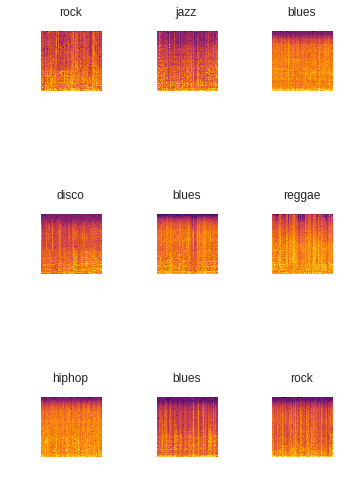

In [0]:
data.show_batch(rows=3, figsize=(5,8))

In [0]:
learner = create_cnn(data, models.resnet34, metrics=accuracy)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:105: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")


In [0]:
learner.fit_one_cycle(10)

epoch,train_loss,valid_loss,accuracy,time
0,2.511748,1.864824,0.313333,01:08
1,1.878916,1.148963,0.576667,00:59
2,1.428073,0.992814,0.643333,00:59
3,1.069364,0.970664,0.676667,00:58
4,0.817980,0.950676,0.670000,01:00
5,0.620688,0.928977,0.690000,00:59
6,0.483234,0.960273,0.680000,00:59
7,0.383060,0.993510,0.683333,00:59
8,0.316172,0.973993,0.693333,00:58
9,0.252070,0.975097,0.690000,00:59


In [0]:
learner.save('../models/resnet34_mtag70')

In [0]:
interp = ClassificationInterpretation.from_learner(learner)

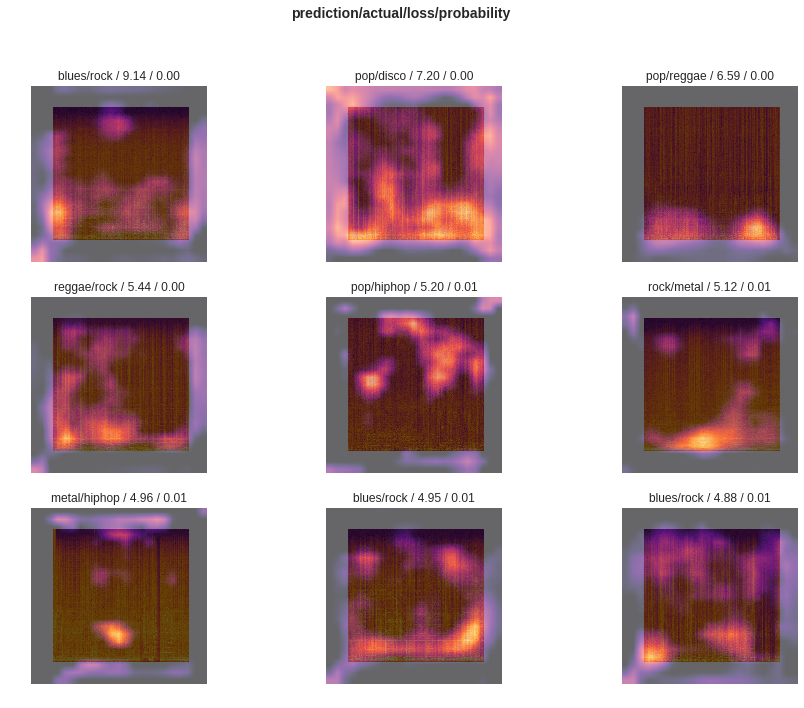

In [0]:
interp.plot_top_losses(9, figsize=(15,11))

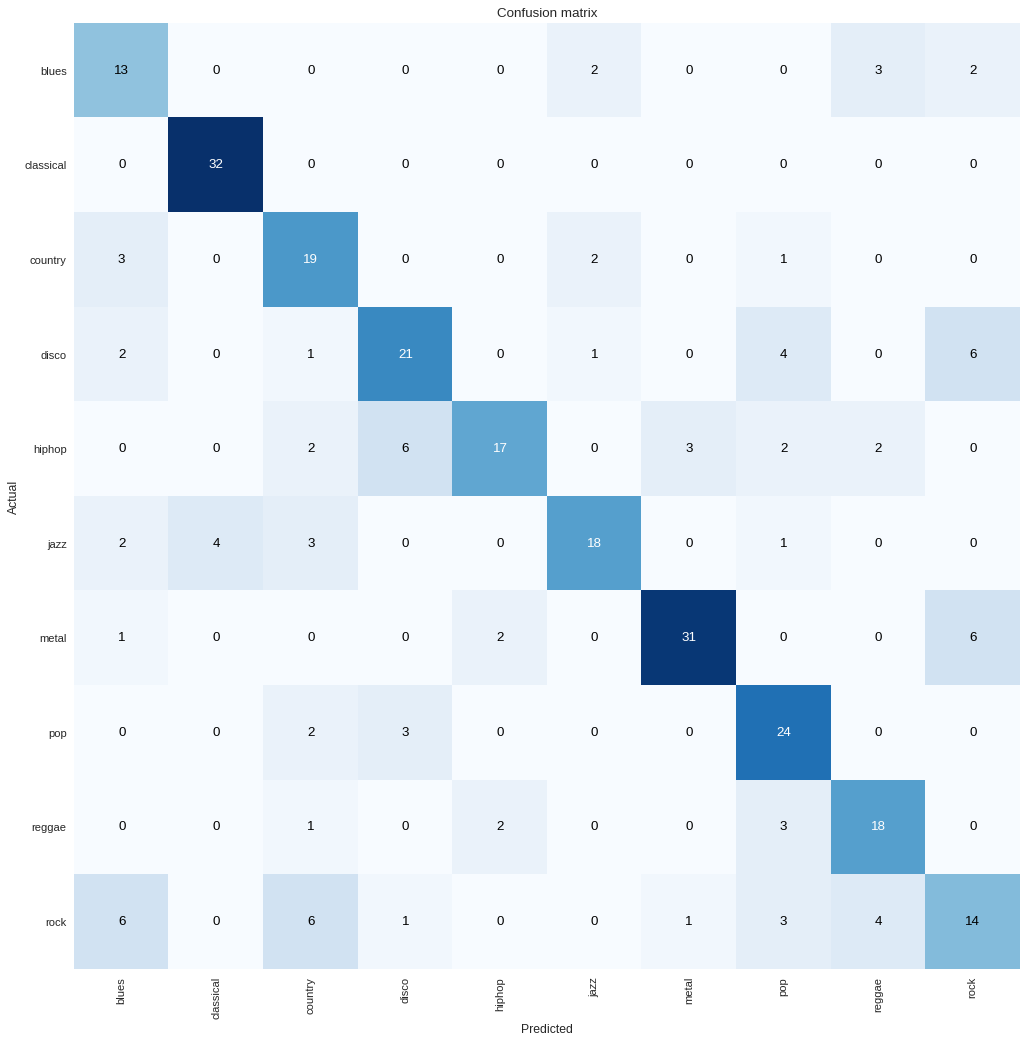

In [0]:
interp.plot_confusion_matrix(figsize=(13,13), dpi=80)

In [0]:
interp.most_confused(min_val=2)

[('disco', 'rock', 6),
 ('hiphop', 'disco', 6),
 ('metal', 'rock', 6),
 ('rock', 'blues', 6),
 ('rock', 'country', 6),
 ('disco', 'pop', 4),
 ('jazz', 'classical', 4),
 ('rock', 'reggae', 4),
 ('blues', 'reggae', 3),
 ('country', 'blues', 3),
 ('hiphop', 'metal', 3),
 ('jazz', 'country', 3),
 ('pop', 'disco', 3),
 ('reggae', 'pop', 3),
 ('rock', 'pop', 3),
 ('blues', 'jazz', 2),
 ('blues', 'rock', 2),
 ('country', 'jazz', 2),
 ('disco', 'blues', 2),
 ('hiphop', 'country', 2),
 ('hiphop', 'pop', 2),
 ('hiphop', 'reggae', 2),
 ('jazz', 'blues', 2),
 ('metal', 'hiphop', 2),
 ('pop', 'country', 2),
 ('reggae', 'hiphop', 2)]

## ResNet50

In [0]:
# Обучите модель ResNet50 и сравните результаты с ResNet34 

# Миссия выполнена!




* Жанровая классификация – лишь одна из многих прикладных отраслей извлечения музыкальной информации.

* Мы разобрались, как организовывается работа с музыкальными сигналами на Python. Эти знания можно применить для решения множества задач: отслеживания ритма, создания музыки, рекомендательных систем, распознавания музыкальных инструментов и т. д.